In [5]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
data

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [7]:
X = data.drop(columns=['target']).values
y = data.target.values

In [8]:
# Instantiate and train model
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=2)

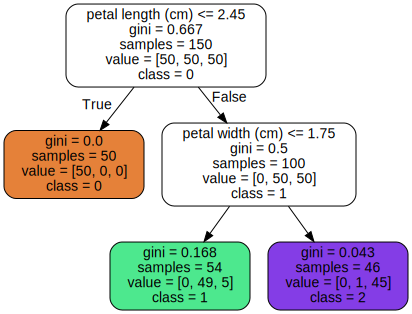

In [9]:
import graphviz

# Export model graph
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="iris_tree.dot", 
                feature_names=data.drop(columns=['target']).columns,
                class_names=['0','1','2'], 
                rounded=True, filled=True)

# Import model graph
with open("iris_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [10]:
# Calculate gini of root node
1 - (50/150)**2 - (50/150)**2 - (50/150)**2

0.6666666666666665

In [11]:
# Calcultate gini green leaf
1 - 0**2 - (49/54)**2 - (5/54)**2

0.1680384087791495

In [12]:
# Let's predict the class of a new flower
print(tree_clf.predict([[4,1]]))

[1.]


In [13]:
# Predict proba
print(tree_clf.predict_proba([[4,1]]))

[[0.         0.90740741 0.09259259]]


In [18]:
#!pip install mlxtend

In [21]:
plot_decision_regions

<function mlxtend.plotting.decision_regions.plot_decision_regions(X, y, clf, feature_index=None, filler_feature_values=None, filler_feature_ranges=None, ax=None, X_highlight=None, zoom_factor=1.0, legend=1, hide_spines=True, markers='s^oxv<>', colors='#1f77b4,#ff7f0e,#3ca02c,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf', scatter_kwargs=None, contourf_kwargs=None, contour_kwargs=None, scatter_highlight_kwargs=None, n_jobs=None)>